In [111]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [163]:
df = pd.read_csv(r"C:\Users\Neel Arora\Downloads\BankNote_Authentication.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [164]:
df['class'].unique()

array([0, 1])

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [167]:
df.shape

(1372, 5)

In [168]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [169]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [171]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
Y = df['class']

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [173]:
reg = DecisionTreeRegressor(max_depth=3)

In [174]:
reg.fit(X_train,Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [175]:
X_train

,variance,skewness,curtosis,entropy
311,5.02970,-4.97040,3.50250,-0.237510
861,-2.37970,-1.44020,1.12730,0.160760
785,-1.66620,-0.30005,1.42380,0.024986
1353,0.11592,3.22190,-3.43020,-2.845700
215,6.09190,2.96730,-1.32670,1.455100
...,...,...,...,...
1095,1.16400,3.91300,-4.55440,-3.867200
1130,-2.29180,-7.25700,7.95970,0.921100
1294,-7.03640,9.29310,0.16594,-4.539600
860,-3.46050,2.69010,0.16165,-1.022400


In [176]:
Y_train

311     0
861     1
785     1
1353    1
215     0
       ..
1095    1
1130    1
1294    1
860     1
1126    1
Name: class, Length: 823, dtype: int64

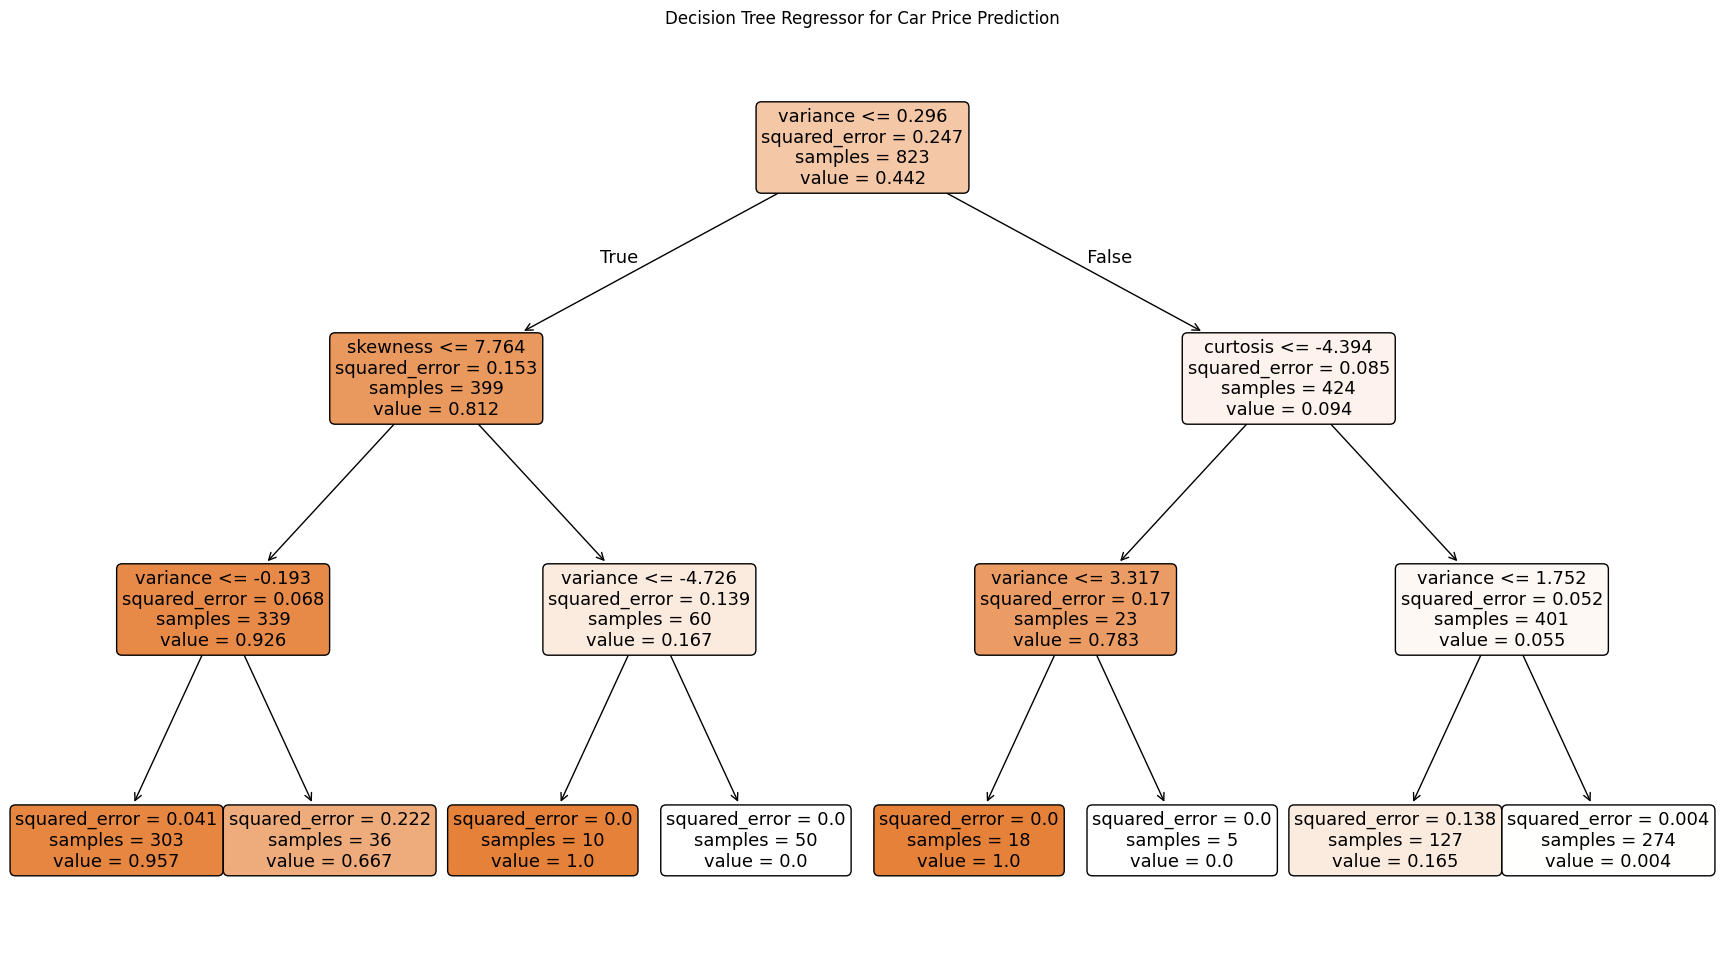

In [177]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22,12))
plot_tree(
    reg,
    feature_names=X.columns,
    filled=True,
    rounded=True
    )
plt.title("Decision Tree Regressor for Car Price Prediction")
plt.show()

In [178]:
reg.get_depth()

3

In [179]:
X_test

,variance,skewness,curtosis,entropy
430,1.569100,6.3465,-0.18280,-2.40990
588,-0.278020,8.1881,-3.13380,-2.52760
296,0.051979,7.0521,-2.05410,-3.15080
184,-1.755900,11.9459,3.09460,-4.89780
244,2.428700,9.3821,-3.24770,-1.45430
...,...,...,...,...
273,2.694600,6.7976,-0.40301,0.44912
906,-2.914600,4.0537,-0.45699,-4.03270
362,1.745200,4.8028,2.08780,0.62627
2,3.866000,-2.6383,1.92420,0.10645


In [180]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([0.16535433, 0.        , 0.66666667, 0.        , 0.00364964,
       0.00364964, 0.66666667, 0.00364964, 0.00364964, 0.16535433,
       0.16535433, 0.95709571, 0.16535433, 0.95709571, 0.95709571,
       1.        , 0.95709571, 0.95709571, 0.95709571, 0.95709571,
       0.00364964, 0.00364964, 0.95709571, 0.00364964, 0.95709571,
       0.00364964, 0.00364964, 0.95709571, 0.        , 0.00364964,
       0.95709571, 0.16535433, 0.16535433, 1.        , 0.95709571,
       0.00364964, 0.16535433, 0.16535433, 0.95709571, 0.16535433,
       0.16535433, 0.95709571, 0.66666667, 0.00364964, 0.95709571,
       0.95709571, 0.95709571, 0.00364964, 0.00364964, 1.        ,
       0.00364964, 0.00364964, 0.        , 0.00364964, 0.66666667,
       0.66666667, 0.        , 0.00364964, 0.00364964, 0.00364964,
       0.95709571, 0.00364964, 0.66666667, 0.00364964, 0.        ,
       0.00364964, 0.00364964, 0.00364964, 0.95709571, 0.66666667,
       0.95709571, 0.00364964, 0.95709571, 0.00364964, 0.16535

In [181]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred_test)

0.7588028287625286

In [182]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(Y_train, reg.predict(X_train))
test_mse  = mean_squared_error(Y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.04734648073451282
Test MSE: 0.05964928699539365


In [183]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(Y_train, reg.predict(X_train))
test_mse  = mean_squared_error(Y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.04734648073451282
Test MSE: 0.05964928699539365


In [184]:
path = reg.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.00275712 0.00329781 0.00475461 0.01012556 0.013998
 0.03573825 0.12865108]


In [185]:
parameters = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [2, 3, 4, 5, 6 , 7, 8, 9, 10],
    'splitter': ['best', 'random'],
    'max_features': [None, 'auto', 'sqrt', 'log2']
    }

regression = DecisionTreeRegressor()

In [186]:
from sklearn.model_selection import GridSearchCV

reg_cv = GridSearchCV(regression, param_grid=parameters, cv=5 , scoring='r2')

In [187]:
reg_cv.fit(X_train, Y_train)

a:\my_codes\my_project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "a:\my_codes\my_project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "a:\my_codes\my_project\.venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "a:\my_codes\my_project\.venv\Lib\site-packages\sklearn\base.py", line 471, in _

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [2, 3, ...], 'max_features': [None, 'auto', ...], 'splitter': ['best', 'random']}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [188]:
reg_cv.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [189]:
Y_predict_cv = reg_cv.predict(X_test)

In [190]:
r2_score(Y_test, Y_predict_cv)

0.9304381657677963